## First NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
N = 1000
gaussian_quantiles = make_gaussian_quantiles(
    mean=None,
    cov=0.1,
    n_samples = N,
    n_features= 2,
    n_classes = 2,
    shuffle= True,
    random_state = None

)

X, Y = gaussian_quantiles

In [3]:
Y = Y[:, np.newaxis]

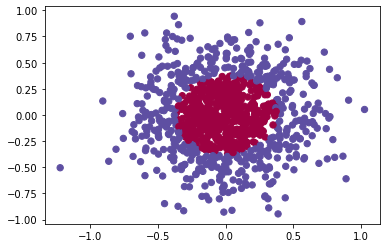

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y[:,0], s=40, cmap=plt.cm.Spectral)

#### Activation Functions

In [11]:
def sigmoid(x, derivate=False):
    if derivate:
        return np.exp(-x) / ((np.exp(-x) + 1)**2)
    else:
            return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x<=0] = 0
        x[x>0] = 1
        return x
    else:
        return np.maximum(0,x)

####  Loss function

In [6]:
def mse(y, y_hat, derivate=False):
    if derivate:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2 )

#### Structure

In [7]:
def inizialize_parameters_deep(layers_dim: list) -> dict:
    parameters = {}
    L = len(layers_dim)
    for l in range(0, L-1):
        parameters["W"+str(l+1)] = (np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
        parameters["b"+str(l+1)] = (np.random.rand(1, layers_dim[l+1])*2)-1
    return parameters

In [8]:
layes_dims = [2,4,8,1]
params = inizialize_parameters_deep(layes_dims)
params

{'W1': array([[-0.99482339, -0.25894907, -0.80083861,  0.22784743],
        [ 0.89562179,  0.9594556 ,  0.13445159, -0.25332542]]),
 'b1': array([[-0.31409381,  0.81188412, -0.69145685,  0.83670606]]),
 'W2': array([[-0.51417228,  0.42745165, -0.15515148,  0.72192245, -0.75929805,
         -0.7958221 , -0.039619  , -0.70692891],
        [ 0.08641207,  0.07496228, -0.23207397,  0.52004047,  0.8318034 ,
          0.07694841,  0.8219091 ,  0.56438014],
        [-0.57694782,  0.83749469,  0.75933269,  0.38175352, -0.59403392,
          0.6889671 ,  0.85044889, -0.26096307],
        [-0.38277185, -0.63307007, -0.87233168, -0.31022909, -0.91444217,
         -0.4998942 , -0.8534788 ,  0.08538894]]),
 'b2': array([[ 0.10712203,  0.76182158, -0.9000143 ,  0.5104134 ,  0.7802716 ,
          0.93612866,  0.11648964, -0.90125526]]),
 'W3': array([[ 0.31066373],
        [-0.65023193],
        [-0.44285266],
        [-0.46785954],
        [ 0.00894087],
        [ 0.70439918],
        [ 0.49229998],


In [9]:
X@params["W1"] # Point Product

array([[-0.66883979, -0.2565034 , -0.47187433,  0.15865485],
       [ 0.26164507,  0.26625288,  0.05061644, -0.07307424],
       [-0.74937933, -0.36034443, -0.46978389,  0.18260069],
       ...,
       [-0.5086373 , -0.3681649 , -0.21906684,  0.13214011],
       [ 0.69165268,  0.50260302,  0.29630214, -0.17981663],
       [-0.29132757, -0.22791009, -0.11171299,  0.07681542]])

In [26]:
def train(x_data, params: dict, lr:float = 0.0001,training:bool = True ):
    #Forward
    params["A0"] = x_data

    params["Z1"] = np.matmul(params["A0"], params["W1"]) + params["b1"]
    params["A1"] = relu(params["Z1"])

    params["Z2"] = np.matmul(params["A1"], params["W2"]) + params["b2"]
    params["A2"] = relu(params["Z2"])

    params["Z3"] = np.matmul(params["A2"], params["W3"]) + params["b3"]
    params["A3"] = sigmoid(params["Z3"])

    output = params["A3"]
    
    if training:
        # Backpropagation
        params["dZ3"] = mse(Y, output, True) * sigmoid(params["A3"], True)
        params["dW3"] = np.matmul(params["A2"].T, params["dZ3"])

        params["dZ2"] = np.matmul(params["dZ3"], params["W3"].T) * relu(params["A2"], True)
        params["dW2"] = np.matmul(params["A1"].T, params["dZ2"])

        params["dZ1"] = np.matmul(params["dZ2"], params["W2"].T) * relu(params["A1"], True)
        params["dW1"] = np.matmul(params["A0"].T, params["dZ1"])

        # Gradient Descent
        params["W3"] = params["W3"] - params["dW3"] * lr # Learning Rate
        params["b3"] = params["b3"] - np.mean(params["dW3"], axis=0, keepdims=True) * lr


        params["W2"] = params["W2"] - params["dW2"] * lr # Learning Rate
        params["b2"] = params["b2"] - np.mean(params["dW2"], axis=0, keepdims=True) * lr


        params["W1"] = params["W1"] - params["dW1"] * lr # Learning Rate
        params["b1"] = params["b1"] - np.mean(params["dW1"], axis=0, keepdims=True) * lr

    return output

In [34]:
layes_dims = [2,4,8,1]
params = inizialize_parameters_deep(layes_dims)
errors = []

for _ in range(50000):
    output = train(X,params, 0.0001)
    if _ % 50 == 0:
        err = mse(Y, output)
        print(err)
        errors.append(err)
        


0.42704105460959335
0.28007899636038197
0.2552350202235835
0.2527053831891933
0.25216854029812413
0.2518229634037229
0.2515178656817426
0.25123174612188337
0.25095486665095806
0.2506797699431681
0.250400958010148
0.2501135369682415
0.24981296019750288
0.24949507212453875
0.24915471692505797
0.2487872368932007
0.2483875918852439
0.24795164091535615
0.24747143287323162
0.24694302027381212
0.2463518795988801
0.24569680421212176
0.24497459400379518
0.24418716099984442
0.24334789958833175
0.24245407258739599
0.24150633502183677
0.2405002854025622
0.23942608132590837
0.23828083021848523
0.23710396640431056
0.2358879703667494
0.2346644695019936
0.2334410490052739
0.23224308194383314
0.23110880271256418
0.23004023057598624
0.22907330074541649
0.22821185288199378
0.22746136868951386
0.22681463351878142
0.22627545155219514
0.2258187960418494
0.22545164579017443
0.22514605690127695
0.22487083663869284
0.22461691096472808
0.22440191982100122
0.22424400538287514
0.22407428280489888
0.22389682000633

0.1548757854530053
0.15486477160001083
0.15484162837415874
0.1548179294594234
0.15479792191235303
0.15478071294831608
0.1547655866284758
0.15475201530848853
0.154739610777655
0.15472808829478873
0.15471721508518402
0.15470682567133684
0.15469681500488477
0.1546871022882594
0.15467762776788435
0.154668347452872
0.15465922901042506
0.15465024871825614
0.15464138920689066
0.15463263778689013
0.15462306153327132
0.15461074938513886
0.15459842729657328
0.15458616392153937
0.1545739424230969
0.1545609488261426
0.15454826253466475
0.15453709478709204
0.15452739088060496
0.15451731233787108
0.15450698300556656
0.15449661646404517
0.15449120875581684
0.15448537305759885
0.15447862277275493
0.15447060025475579
0.15446263870889687
0.15445427962979125
0.1544456760763268
0.15443691836220172
0.15442807114379528
0.15441921564459976
0.1544104203869019
0.1544017369133716
0.1543931722387097
0.15438458906946123
0.154376198004617
0.15436784173445348
0.15435959546458575
0.15435145706229111
0.15434339266749

KeyboardInterrupt: 

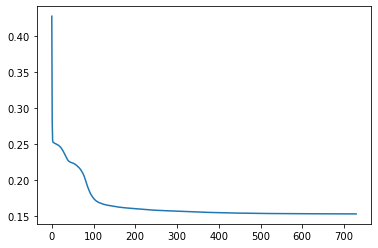

In [35]:
plt.plot(errors)